In [29]:
from DataLoading import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_loader = DataLoader("config.share")
df = data_loader.load_table(device_id="1a9da8fa-6fa8-49f3-8aaa-420b34eefe57", year_month=[
    "202101", "202102","202103", "202104", "202105", "202106", "202107", "202108", "202109", "202110", "202111", "202112"])

df2 = data_loader.load_table(device_id="1a9da8fa-6fa8-49f3-8aaa-420b34eefe57", year_month=[
    "202005", "202006","202007", "202008", "202009", "202010", "202011", "202012", ])

In [22]:
df2.head(10)

,device_id,dataprofile_id,cloud_received_time,sample_time,year,year_month,year_month_day,influx_migration_source_filename,T1_remote_K,T2_embeded_K,...,SpDeltaT_applied_K,Error_Status_Cloud,DDC_BUS_Sp_Write,dT_Manager_Ste,Active_dT_Manager_total_h,DeltaT_K,DDC_Sp_V,OperatingHours,Flow_Volume_total_m3,Y3AnalogInputValue


In [30]:
# sort df by sample time
df = df.sort_values("sample_time")

In [31]:
x = list(df.columns)
print(sorted(x))

['AbsFlow_Fb_m3s', 'AbsPower_Fb_W', 'Active_dT_Manager_total_h', 'ControlMode_Write', 'Cooling_E_J', 'DDC_BUS_Sp_Write', 'DDC_Sp_Rel', 'DDC_Sp_V', 'DN_Size', 'DeltaT_K', 'DeltaT_Limitation_Write', 'Error_Status_Cloud', 'Flow_Volume_total_m3', 'Glycol_Concentration_Rel', 'Heating_E_J', 'InstallationPosition_Write', 'OperatingHours', 'Override_Write', 'Pmax_Rel_Write', 'RelFlow_Fb_Rel2Vmax', 'RelPos_Fb', 'RelPower_Fb_Rel2Pmax', 'SpDeltaT_K_Write', 'SpDeltaT_applied_K', 'SpFlow_DeltaT_lmin_Write', 'T1_remote_K', 'T2_embeded_K', 'Vmax_Rel_Write', 'Y3AnalogInputValue', 'cloud_received_time', 'dT_Manager_Ste', 'dataprofile_id', 'device_id', 'influx_migration_source_filename', 'sample_time', 'year', 'year_month', 'year_month_day']


In [32]:

# Ensure datetime format
df["sample_time"] = pd.to_datetime(df["sample_time"])
df2["sample_time"] = pd.to_datetime(df2["sample_time"])

# Extract only month (not year-month) for comparison
df["month"] = df["sample_time"].dt.strftime("%B")
df2["month"] = df2["sample_time"].dt.strftime("%B")

# Compute average Delta T per month for each year
df_avg_delta_t = df.groupby("month")["DeltaT_K"].mean().reset_index()
df_avg_delta_t2 = df2.groupby("month")["DeltaT_K"].mean().reset_index()

# Sort by month order
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_avg_delta_t["month"] = pd.Categorical(df_avg_delta_t["month"], categories=month_order, ordered=True)
df_avg_delta_t2["month"] = pd.Categorical(df_avg_delta_t2["month"], categories=month_order, ordered=True)

# Sort values
df_avg_delta_t = df_avg_delta_t.sort_values("month")
df_avg_delta_t2 = df_avg_delta_t2.sort_values("month")


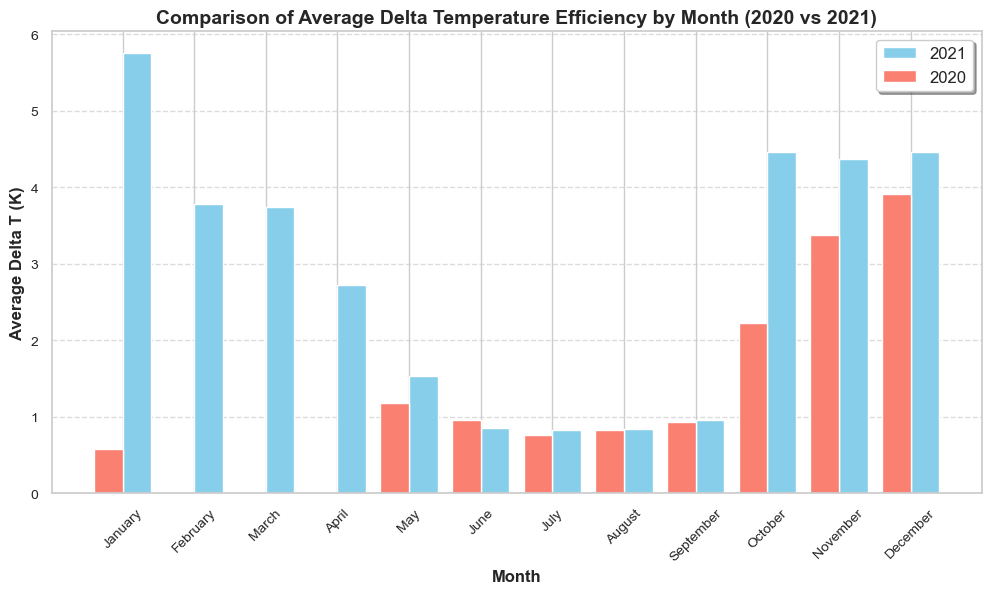

In [33]:

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_avg_delta_t["month"], df_avg_delta_t["DeltaT_K"], color="skyblue", label="2021", width=0.4, align="edge")
plt.bar(df_avg_delta_t2["month"], df_avg_delta_t2["DeltaT_K"], color="salmon", label="2020", width=-0.4, align="edge")

# Labels and formatting
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Average Delta T (K)", fontsize=12, fontweight="bold")
plt.title("Comparison of Average Delta Temperature Efficiency by Month (2020 vs 2021)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12, frameon=True, shadow=True, fancybox=True)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()